In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('monthly-milk-production.csv', ';', index_col=['milk'], parse_dates=['month'], dayfirst=True)

In [3]:
indices = []
for index, row in data.iterrows():
    indices.append(index / calendar.monthrange(row['month'].year, row['month'].month)[1])
data.index = indices

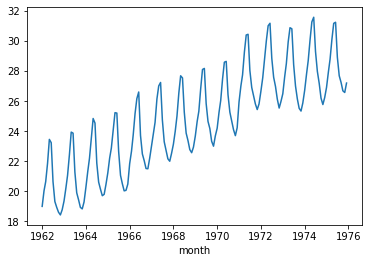

In [4]:
sns.lineplot(x=data['month'], y=data.index);

In [12]:
import statsmodels.tsa.stattools as smt 
tmp = data.copy()
tmp = tmp - tmp.shift(12)
tmp = tmp - tmp.shift(1)
smt.adfuller(tmp)[1]

3.2193172144920112e-24

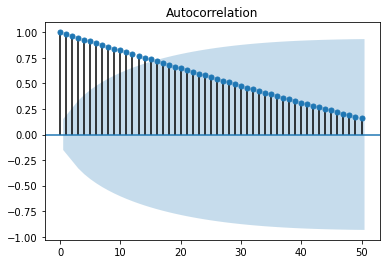

In [14]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(data.values.squeeze(), lags=50);

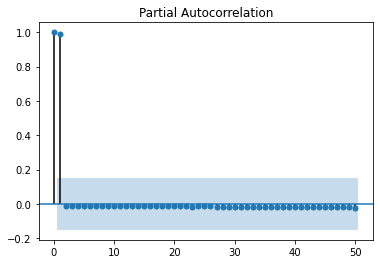

In [15]:
sm.graphics.tsa.plot_pacf(data.values.squeeze(), lags=50);